In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np   # use for mathematical problems
import pandas as pd # use to do task on data frame
import matplotlib.pyplot as plt # use to plot graph
from statsmodels.tsa.seasonal import seasonal_decompose  # use to find components of seasonal decompose
from statsmodels.tsa.stattools import adfuller  # use to check fata is stationary
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  # USE TO GET P AND Q VALUE 
import  statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from  sklearn.metrics import mean_squared_error  # use to calculate error
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_json('Amazon home&kitchen_jsonfile_new_10perdata.json',orient='split')

In [316]:
#df.to_csv("C:\channappa\capstone project\home.csv")

In [33]:
df=df.sort_values(by='Time',ascending=True)

In [34]:
df2=df.copy()

In [30]:
df2.shape

(421428, 16)

In [289]:
df.isnull().sum()

productID             0
categories            0
price                 0
brand                 0
product_name          0
reviewerID            0
reviewerName          0
overall               0
review_text           0
pos_feedback          0
neg_feedback          0
rating_class          0
Time                  0
tokenized             0
Polarity              0
Sentiment             0
Sentiment_Analysis    0
dtype: int64

In [6]:
df.describe()

,price,overall,pos_feedback,neg_feedback,Polarity,Sentiment
count,421428.000000,421428.000000,421428.000000,421428.000000,421428.000000,421428.000000
mean,57.522042,4.098019,2.205255,0.416804,0.277318,0.921045
std,80.889853,1.332770,17.223774,2.298147,0.233937,0.318427
min,0.010000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,14.990000,4.000000,0.000000,0.000000,0.133333,1.000000
50%,34.990000,5.000000,0.000000,0.000000,0.273016,1.000000
75%,66.000000,5.000000,1.000000,0.000000,0.425000,1.000000
max,999.990000,5.000000,3756.000000,469.000000,1.000000,2.000000


In [8]:
df.dtypes

productID              object
categories             object
price                 float64
brand                  object
product_name           object
reviewerID             object
reviewerName           object
overall                 int64
review_text            object
pos_feedback            int64
neg_feedback            int64
rating_class           object
Time                   object
tokenized              object
Polarity              float64
Sentiment               int64
Sentiment_Analysis     object
dtype: object

In [47]:
mask = (df['Time'] > '2010-1-1') & (df['Time'] <= '2014-12-31')
df = df.loc[mask]

In [39]:
df2

,productID,categories,price,brand,product_name,reviewerID,reviewerName,overall,review_text,pos_feedback,neg_feedback,rating_class,tokenized,Polarity,Sentiment,Sentiment_Analysis
Time,,,,,,,,,,,,,,,,
1999-12-04 00:00:00+00:00,B00002SAO2,home kitchen artwork posters prints video ga...,76.273582,nan,,AFHJFPWNQDQE,"""sir_tripsalot""",5,wonderful romp through a giganitic ship dougla...,8,4,good,"['wonderful', 'romp', 'giganitic', 'ship', 'do...",0.269583,1,Positive
2000-04-24 00:00:00+00:00,B00004RHR6,home kitchen kitchen dining kitchen utensils...,51.655678,hoffritz,stainlesssteel manual can opener,AAE95UYBYNCP6,Betina Chan,4,opens anything and everything hoffritz has a n...,30,12,good,"['opens', 'anything', 'everything', 'hoffritz'...",0.275000,1,Positive
2000-05-02 00:00:00+00:00,B00004SY7L,home kitchen kitchen dining cookware cookwar...,64.348455,calphalon,commercial hardanodized piece cookware set,ADGT49GN6CQNJ,S. Bauer,4,the best money can buy you cant go wrong with ...,9,0,good,"['best', 'money', 'buy', 'cant', 'go', 'wrong'...",0.209957,1,Positive
2000-05-02 00:00:00+00:00,B00004RDCT,home kitchen kitchen dining kitchen utensils...,48.648521,progressive,international cup gravy separator,A20SOBM0RWYPOD,erek,1,old technology fat separator once upon a time ...,17,15,bad,"['old', 'technology', 'fat', 'separator', 'upo...",0.025000,1,Positive
2000-05-02 00:00:00+00:00,B00004S8DX,home kitchen kitchen dining cookware cookwar...,62.080348,meyer,anolon classic piece cookware set,A3YNKCNKA5HAN,Daniel W. DeLuca,5,best highend nonstick value after experimentin...,43,1,good,"['best', 'highend', 'nonstick', 'value', 'expe...",0.387302,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-23 00:00:00+00:00,B00KILOAXE,home kitchen kitchen dining kitchen utensils...,19.950000,vegepal,spiral slicer best quality stainless,A3MXNRZDBZVOBY,Margie Jordan,5,boodles of fun i could not wait to get home an...,0,0,good,"['boodles', 'fun', 'could', 'wait', 'get', 'ho...",0.215365,1,Positive
2014-07-23 00:00:00+00:00,B00IDXGIAC,home kitchen heating cooling air quality air...,417.190000,quirky,ge aros smart window air,A2020EPZ0NLS3E,Kyle Wickersham,5,great buy for many reasons i am very satisfied...,0,2,good,"['great', 'buy', 'many', 'reasons', 'satisfied...",0.407143,1,Positive
2014-07-23 00:00:00+00:00,B00KW1ZDCM,home kitchen kitchen dining kitchen utensils...,9.990000,ozera,ice pop molds set of,A351A2418T54US,Lori Parker,5,be mindful of your health for kids seniors and...,0,0,good,"['mindful', 'health', 'kids', 'seniors', 'ozer...",0.143403,1,Positive


## resampling tge data

In [48]:
# Convert time object to datetime and create a new column named 'time'
df['Time'] = pd.to_datetime(df['Time'])

df.set_index('Time',inplace=True)

In [52]:
month=df.resample('w').mean()

In [54]:
month.isnull().sum()

price           0
overall         0
pos_feedback    0
neg_feedback    0
Polarity        0
Sentiment       0
dtype: int64

In [294]:
month.shape

(200, 6)

In [295]:
month.isnull().sum()

price           0
overall         0
pos_feedback    0
neg_feedback    0
Polarity        0
Sentiment       0
dtype: int64

In [16]:
df.shape

(362585, 16)

## calculate time series components

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
decompose=seasonal_decompose(month['Sentiment'],period=52)
trend=decompose.trend
seasonal=decompose.seasonal
resid=decompose.resid

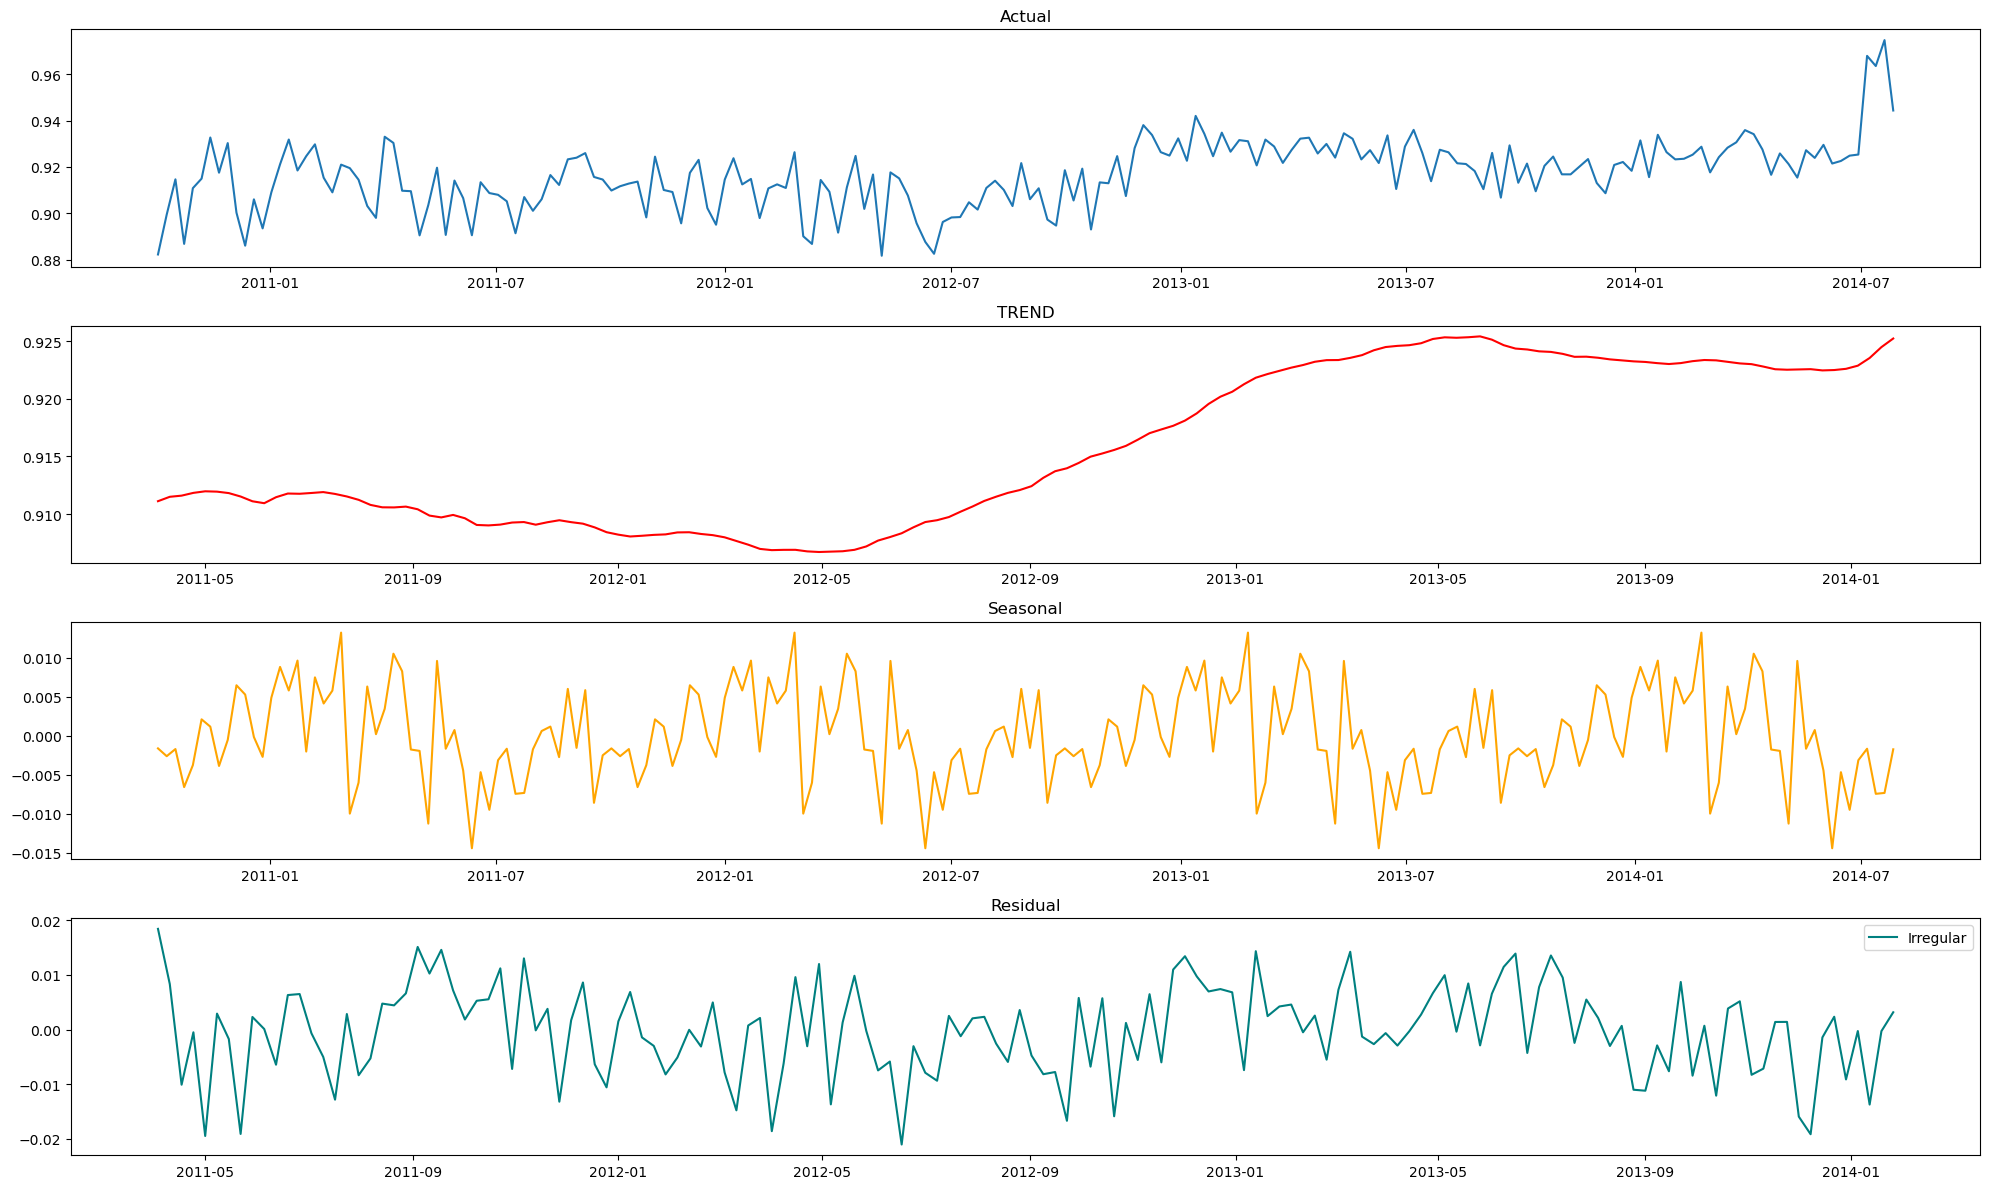

In [56]:
plt.figure(figsize=(20,12))
plt.subplot(4,1,1)
plt.plot(month['Sentiment'],label='original')
plt.title('Actual')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend',color='r')
plt.title('TREND')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality',color='orange')
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(resid,label='Irregular',color='teal')
plt.title('Residual')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from statsmodels.tsa.stattools import  adfuller 

In [57]:
## check data stationary
def sta(data):
    pvalue=adfuller(data)[1]
    
    if pvalue <0.05:
        ret='data is astationary'
    else:
        ret='data is not stationary'
    return ret

In [58]:
price=month['Sentiment']
price

Time
2010-10-03 00:00:00+00:00    0.882353
2010-10-10 00:00:00+00:00    0.899510
2010-10-17 00:00:00+00:00    0.914692
2010-10-24 00:00:00+00:00    0.886918
2010-10-31 00:00:00+00:00    0.910891
                               ...   
2014-06-29 00:00:00+00:00    0.925357
2014-07-06 00:00:00+00:00    0.967818
2014-07-13 00:00:00+00:00    0.963445
2014-07-20 00:00:00+00:00    0.974599
2014-07-27 00:00:00+00:00    0.944310
Freq: W-SUN, Name: Sentiment, Length: 200, dtype: float64

In [59]:
sta(price)

'data is not stationary'

In [62]:
diff=price-price.shift(1)
diff.dropna(inplace=True)

In [63]:
sta(diff)


'data is astationary'

In [304]:
len(price)

200

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

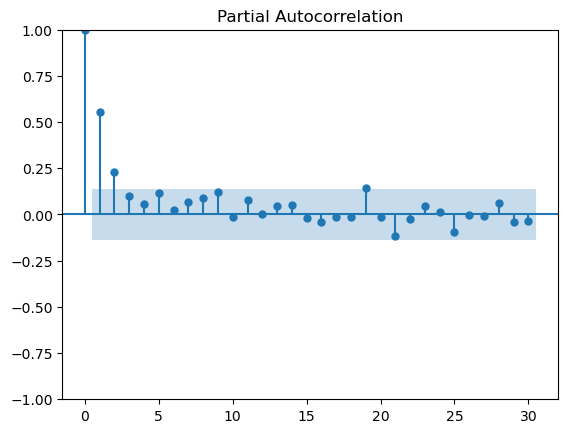

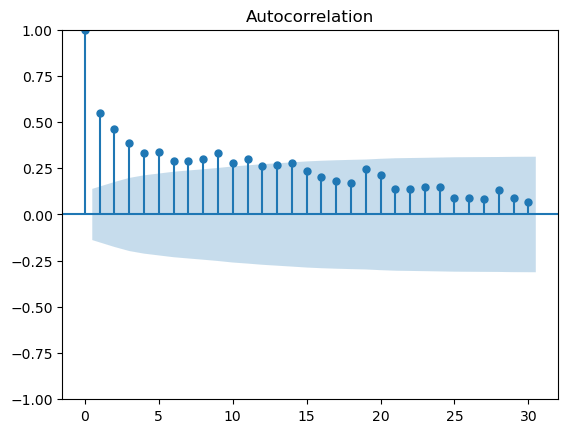

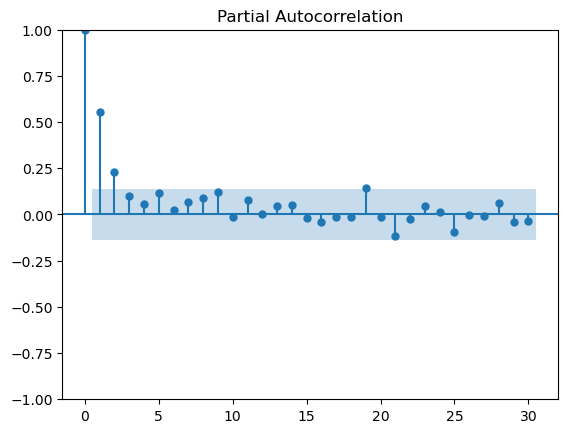

In [64]:
plot_acf(month.Sentiment,lags=30)
plot_pacf(month.Sentiment,lags=30)

q=11
p=5

In [65]:
l=int(0.7*len(month.Sentiment))
train=month.Sentiment.iloc[:l]
test=month.Sentiment.iloc[l:]
print(train.shape,test.shape)

(140,) (60,)


In [66]:
from sklearn.metrics import mean_squared_error

## Build a ARIMA model, build a function for checking the best model

In [26]:
from pmdarima import auto_arima

In [72]:
def arima_model(data):
    
    list1 = []
    for p in range(5):
        
        for q in range(13):
            list1.append((p,1,q))
           
    model = []
    for i in list1:
        
        m=ARIMA(train,order=i).fit()
        model.append(m)
       
    forecast = []
    for v in model:
        
        f=v.predict(0,len(test)-1)
        forecast.append(f)
       
    RMSE=[]
    for a in forecast[0:]:
        
        rmse = mean_squared_error(test,a,squared=False)
        RMSE.append(round(rmse,3))
    df1=pd.DataFrame()
    df1['list']=list1
    df1['model']=model
    df1['forecast']=forecast
    df1['rmse']=RMSE
   
       
    return(df1)

In [73]:
dff=arima_model(train) 

In [74]:
dff[dff.rmse==dff.rmse.min()] 

,list,model,forecast,rmse
0,"(0, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
1,"(0, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
2,"(0, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
3,"(0, 1, 3)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
4,"(0, 1, 4)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
...,...,...,...,...
60,"(4, 1, 8)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
61,"(4, 1, 9)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
62,"(4, 1, 10)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
63,"(4, 1, 11)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121


In [76]:
from pmdarima import auto_arima

In [77]:
m1 = auto_arima(month['Sentiment'],start_p=0,max_p=5, start_q=0,max_q=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1150.986, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1191.161, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1217.480, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1152.877, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1217.329, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1216.062, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1214.543, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1218.210, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1217.881, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1217.568, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1192.841, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1215.184, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.419 seconds
                               SARIMAX Results                              

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
model=SARIMAX(train,order=(0,1,1),seasonal_order=(0,1,1,52)).fit()

In [79]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sentiment   No. Observations:                  140
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                 240.972
Date:                            Sun, 11 Dec 2022   AIC                           -475.945
Time:                                    15:42:43   BIC                           -468.547
Sample:                                10-03-2010   HQIC                          -472.966
                                     - 06-02-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8041      0.073    -11.085      0.000      -0.946      -0.662
ma.S.L52      -0.8680      1.401   

In [81]:
sarima_predict=model.predict(len(train),len(train)+len(test)-1)
sarima_forecast=model.predict(len(month),len(month)+104)

In [83]:
month['Sentiment']

Time
2010-10-03 00:00:00+00:00    0.882353
2010-10-10 00:00:00+00:00    0.899510
2010-10-17 00:00:00+00:00    0.914692
2010-10-24 00:00:00+00:00    0.886918
2010-10-31 00:00:00+00:00    0.910891
                               ...   
2014-06-29 00:00:00+00:00    0.925357
2014-07-06 00:00:00+00:00    0.967818
2014-07-13 00:00:00+00:00    0.963445
2014-07-20 00:00:00+00:00    0.974599
2014-07-27 00:00:00+00:00    0.944310
Freq: W-SUN, Name: Sentiment, Length: 200, dtype: float64

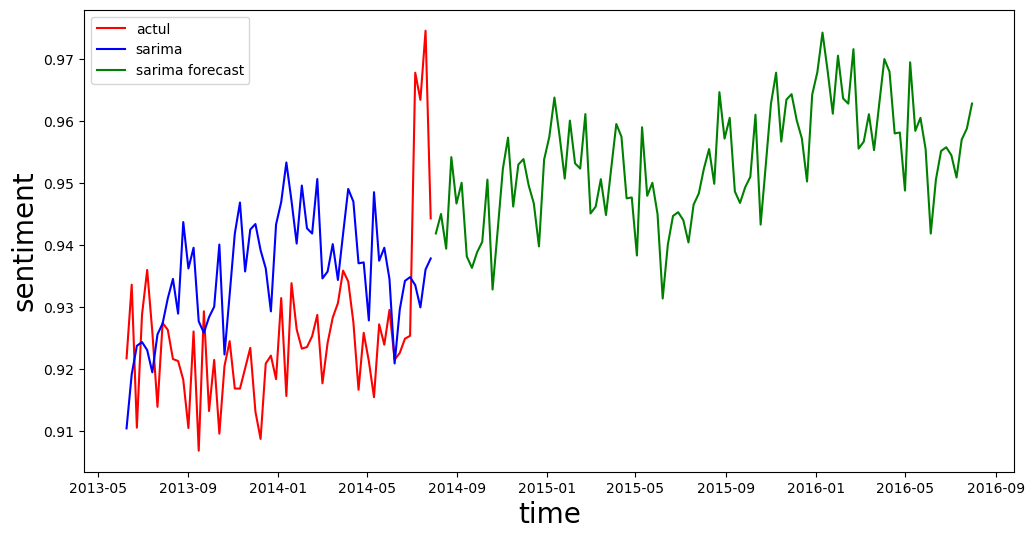

In [84]:
plt.figure(figsize=(12,6))
plt.plot(test,color='r',label='actul')
plt.plot(sarima_predict,color='b',label='sarima')
plt.plot(sarima_forecast,color='g',label='sarima forecast')
plt.ylabel('sentiment',fontsize=(20))
plt.xlabel('time',fontsize=(20))

plt.legend()
plt.show()